# **kernel en analisis estadistico**

El término kernel se usa en análisis estadístico para referirse a una función de ventana*. El término "kernel" tiene varios significados distintos en diferentes ramas de las estadísticas.


*función matemática que tiene valor cero fuera de algún intervalo elegido, normalmente simétrica alrededor de la mitad del intervalo, generalmente cerca de un máximo en el medio y generalmente disminuyendo desde el medio.

--------------


## **Métodos de suavizado de kernel**

**Concepto principal:** Un suavizado de kernel es una técnica estadística para estimar una función de valor real $f(X)$  sobre el dominio $\mathbb{R}^p$  como el promedio ponderado de los datos observados vecinos.

* El peso lo define el kernel, de modo que los puntos más cercanos reciben pesos más altos.

* La función estimada es suave y el nivel de suavidad se establece mediante un solo parámetro. El suavizado del kernel es un tipo de media móvil ponderada.

Describimos ahora una clase de técnicas de regresión que logran flexibilidad en la estimación de la función de regresión $f(X)$ sobre el dominio $\mathbb{R}^p$ ajustando un modelo diferente pero simple por separado en cada punto de consulta $x_0$.

Esto se hace para alguna vecindad del punto objetivo $x_0$ para ajustarse al modelo simple, y de tal manera que la función estimada resultante $\hat{f}(X)$ sea suave en $\mathbb{R}^p$.

Esta localización se logra a través de una función de ponderación o _kernel_ $K_\lambda(x_0,x_i)$, que asigna un peso a $x_i$ en función de su distancia desde $x_0$. Los kernel $K_\lambda$ normalmente están indexados por un parámetro $\lambda$ que dicta el ancho de la vecindad. Estos métodos _basados en la memoria_ requieren en principio poco o ningún entrenamiento. El único parámetro que debe determinarse a partir de los datos de entrenamiento es $\lambda$. El modelo, sin embargo, es todo el conjunto de datos de entrenamiento.


También analizamos clases más generales de técnicas basadas en kernel, que se relacionan con métodos estructurados en otros capítulos y son útiles para la estimación y clasificación de la densidad.

__________________________



## Generalidades

Describimos ahora una clase de técnicas de regresión que logran flexibilidad en la estimación de la función de regresión $f(X)$ sobre el dominio $\mathbb{R}^p$ ajustando un modelo diferente pero simple por separado en cada punto de consulta $x_0$.

Esto se hace para alguna vecindad del punto objetivo $x_0$ para ajustarse al modelo simple, y de tal manera que la función estimada resultante $\hat{f}(X)$ sea suave en $\mathbb{R}^p$.

Esta localización se logra a través de una función de ponderación o _kernel_ $K_\lambda(x_0,x_i)$, que asigna un peso a $x_i$ en función de su distancia desde $x_0$. Los kernel $K_\lambda$ normalmente están indexados por un parámetro $\lambda$ que dicta el ancho de la vecindad. Estos métodos _basados en la memoria_ requieren en principio poco o ningún entrenamiento. El único parámetro que debe determinarse a partir de los datos de entrenamiento es $\lambda$. El modelo, sin embargo, es todo el conjunto de datos de entrenamiento.


También analizamos clases más generales de técnicas basadas en kernel, que se relacionan con métodos estructurados en otros capítulos y son útiles para la estimación y clasificación de la densidad.

_________________

# Suavizadores de kernel unidimensionales

El promedio del vecino más cercano $k$ visto

\begin{equation}
\hat{f}(x) = \text{Ave}\left( y_i|x_i\in N_k(x) \right)
\end{equation}


como una estimación de la función de regresión $\text{E}(Y|X=x)$. La idea es relajar la definición de expectativa condicional, como se ilustra en el panel izquierdo de la FIGURA 1, y calcular un promedio en una vecindad del punto objetivo.

El promedio de KNN cambia de manera discreta, lo que lleva a un $\hat{f}$ discontinuo, lo cual es feo e innecesario.

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Creamos una funcion para K-nearest neighbors
def knn(k: int, point:float,
        data_x:np.ndarray, data_y:np.ndarray) -> float:
    idx_sorted = np.argsort((data_x-point)*(data_x-point))[:k]
    return data_y[idx_sorted].mean()

# Creamos una funcion para Epanechnikov
def Epanechnikov(lmbda:float, point:float,
                 data_x:np.ndarray, data_y:np.ndarray) -> float:
    t = np.absolute(data_x-point)/lmbda
    k = np.where(t <= 1, .75*(1-t), 0)
    return (k @ data_y).sum()/k.sum()

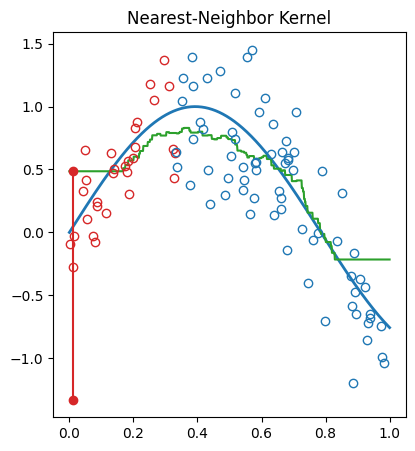

In [26]:
xgrid = np.linspace(0, 1, 1001)
y_true = np.sin(4*xgrid)

size_sample = 100
x_sample = np.random.uniform(size=size_sample)
y_sample = np.sin(4*x_sample) + np.random.randn(size_sample)/3

idx_x0 = 10
x0 = xgrid[idx_x0]  # 0.1
idx_x0_neighbors = np.argsort((x_sample-x0)*(x_sample-x0))

k = 30
y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])

fig61 = plt.figure(61, figsize=(10, 5))
ax1 = fig61.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.plot(x_sample[idx_x0_neighbors[:30]], y_sample[idx_x0_neighbors[:30]],
         'o', color='C3', mfc='none')
ax1.plot(x_sample[idx_x0_neighbors[30:]], y_sample[idx_x0_neighbors[30:]],
         'o', color='C0', mfc='none')
ax1.plot((x0, x0), (ax1.get_ylim()[0], y_knn[idx_x0]), 'o-', color='C3')
ax1.set_title('Nearest-Neighbor Kernel')
plt.show()

### Promedio ponderado del kernel

En lugar de dar a todos los puntos de la vecindad el mismo peso, podemos asignar pesos que desaparezcan suavemente con la distancia desde el punto de destino.

El panel derecho muestra un ejemplo de esto, utilizando el llamado promedio ponderado del kernel de Nadaraya-Watson



\begin{equation}
\hat{f}(x_0) = \frac{\sum_{i=1}^N K_\lambda(x_0, x_i)y_i}{\sum_{i=1}^N K_\lambda(x_0, x_i)},
\end{equation}

con el kernel cuadrático _Epanechnikov_

\begin{equation}
K_\lambda(x_0,x) = D \left( \frac{|x-x_0|}\lambda \right),
\end{equation}

con

\begin{equation}
D(t) = \begin{cases}
\frac34 (1-t^2) & \text{if } |t| \le 1; \\
0 & \text{de otra forma}.
\end{cases}
\end{equation}

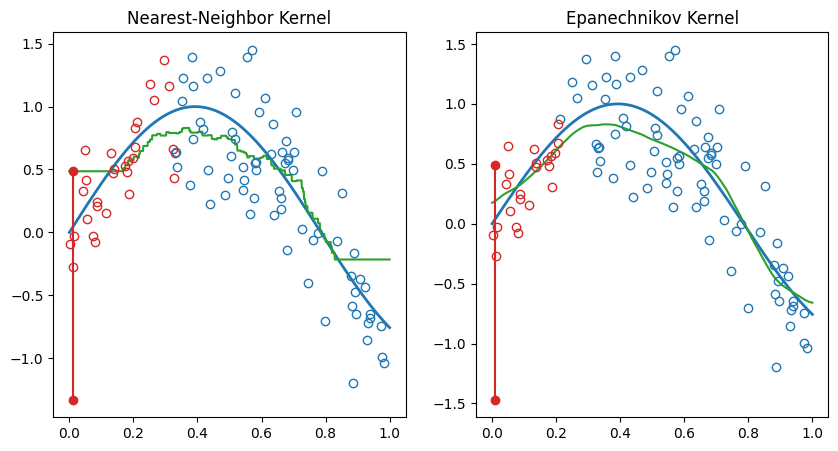

In [27]:
lmbda = .2
y_knn_weighted = np.array([Epanechnikov(lmbda, x, x_sample, y_sample)
                              for x in xgrid])

mask_neighbor = np.absolute(x_sample-x0)/lmbda <= 1

ax2 = fig61.add_subplot(1, 2, 2)
ax2.plot(xgrid, y_true, color='C0', linewidth=2)
ax2.plot(xgrid, y_knn_weighted, color='C2')
ax2.plot(x_sample[~mask_neighbor], y_sample[~mask_neighbor], 'o', color='C0', mfc='none')
ax2.plot(x_sample[mask_neighbor], y_sample[mask_neighbor],
         'o', color='C3', mfc='none')
ax2.plot((x0, x0), (ax1.get_ylim()[0], y_knn[idx_x0]), 'o-', color='C3')
ax2.set_title('Epanechnikov Kernel')
fig61


La función ajustada ahora es continua y bastante fluida en el panel derecho. A medida que movemos el objetivo de izquierda a derecha, los puntos entran en la vecindad inicialmente con peso cero y luego su contribución aumenta lentamente

Tenga en cuenta que usamos un tamaño de ventana métrica $\lambda=0.2$ para el ajuste del núcleo, que no cambia a medida que movemos el punto objetivo $x_0$, mientras que el tamaño de la ventana de suavizado de 30 NN se adapta a la densidad local del $x_i$. Sin embargo, también se pueden usar estos vecindarios adaptativos con núcleos, pero necesitamos usar una notación más general.


\begin{equation}
K_\lambda(x_0, x) = D \left( \frac{|x-x_0|}{h_\lambda(x_0)} \right),
\end{equation}

donde $h_\lambda(x_0)$ es una función de ancho (indexada por $\lambda$) que determina el ancho del vecindario en $x_0$.

* El kernel Epanechnikov usa una constante $h_\lambda(x_0)=\lambda$.
* KNN reemplaza $\lambda$ con el tamaño del vecindario $k$, y nos da

  \begin{equation}
  h_k(x_0) = |x_0 - x_{[k]}|,
  \end{equation}
  
  where $x_{[k]}$ is the $k$th closest $x_i$ to $x_0$.

### Algunas implicaciones

* Se debe determinar el parámetro de suavizado $\lambda$, que determina el ancho de la vecindad local.
  * $\lambda$ grande implica una varianza más baja -- promedios sobre más observaciones,
  * pero mayor sesgo: esencialmente asumimos que la verdadera función es constante dentro de la ventana.

* Los anchos de ventana métrica (constante $h_\lambda(x)$) tienden a mantener constante el sesgo de la estimación, pero la varianza es inversamente proporcional a la densidad local.
  El ancho de la ventana del vecino más cercano exhibe el comportamiento opuesto; la varianza permanece constante y el sesgo absoluto varía inversamente con la densidad local.

* Surgen problemas con los vecinos más cercanos cuando hay empates en el $x$. Con la mayoría de las técnicas de suavizado, uno puede simplemente reducir el conjunto de datos promediando $y_i$ en valores empatados de $X$, y complementando estas nuevas observaciones en los valores únicos de $x_i$ con un peso adicional $w_i$ (que multiplica el peso kernel).

* Esto deja un problema más general para tratar: Pesos de observación $w_i$.
  Operacionalmente, simplemente los multiplicamos por los pesos del núcleo antes de calcular el promedio ponderado. Con los vecindarios más cercanos, ahora es natural insistir en vecindarios con un contenido de peso total $k$ (relativo a $\sum w_i$).
  En caso de desbordamiento (la última observación necesaria en una vecindad tiene un peso $w_j$, lo que hace que la suma de los pesos exceda el presupuesto $k$), entonces se pueden usar partes fraccionarias.

* Surgen problemas de límites. Los vecindarios métricos tienden a contener menos puntos en los límites, mientras que los vecindarios más cercanos se vuelven más anchos.

* El núcleo Epanechnikov tiene soporte compacto (necesario cuando se usa con el tamaño de ventana del vecino más cercano). Otro kernel compacto popular se basa en la función tri-cube

  \begin{equation}
  D(t) = \begin{cases}
  (1-|t|^3)^3 & \text{ if } |t| \le 1;\\
  0 & \text{de otra manera}.
  \end{cases}
  \end{equation}
  
  Esto es
  * más plano en la parte superior (como la caja del vecino más cercano) y
  * diferenciable en la frontera de su soporte.
  
  La función de densidad gaussiana $D(t) = \phi(t)$ es un kernel no compacto popular, en el que la desviación estándar desempeña el papel del tamaño de la ventana.

#**Previo a comparar algo mas, evaluemos el kernel del vecino mas cercano**

Se basa en la idea de que localmente la media condicional (la predicción óptima) es constante. Concretamente, dados un entero $k$  (hiperparámetro) y un conjunto de entrenamiento  $T$ , para obtener la predicción correspondiente a un vector de valores de las variables explicativas $x$, el método de regresión KNN promedia las observaciones en un vecindario  $N_k(x,T)$ formado por las  
$k$ observaciones más cercanas a  $x$ :

 $\hat{Y}(\mathbf{x})=\hat{m}(\mathbf{x})=\frac{1}{k} \sum_{i \in \mathcal{N}_k(\mathbf{x}, \mathcal{T})} Y_i$

Para seleccionar el vecindario es necesario especificar una distancia, por ejemplo:

$d\left(\mathbf{x}_0, \mathbf{x}_i\right)=\left(\sum_{j=1}^p\left|x_{j 0}-x_{j i}\right|^d\right)^{\frac{1}{d}}$

Normalmente se considera la distancia euclídea (d=2) o la de Manhatan (d=1) si los predictores son muméricos (también habría distancias diseñadas para predictores categóricos). En cualquier caso la recomendación es estandarizar previamente los predictores para que no influya su escala en el cálculo de las distancias.
_____________________________



##   Métodos del vecino más cercano

Los métodos del vecino más cercano usan aquellas observaciones en el conjunto de entrenamiento $\mathcal{T}$ más cercanas en el espacio de entrada a $x$ para formar $\hat{Y}$.

El ajuste de kNN para $\hat{Y}$ se define de la siguiente manera:

\begin{equation}
\hat{Y}(x) = \frac{1}{k}\sum_{x_i\in N_k(x)} y_i,
\end{equation}

donde $N_k(x)$ es la vecindad de $x$ definida por los $k$ puntos más cercanos $x_i$ en la muestra de entrenamiento. La cercanía implica una métrica, que por el momento suponemos es la distancia euclidiana.

> Entonces, en otras palabras, encontramos las $k$ observaciones con $x_i$ más cercanas a $x$ en el espacio de entrada, y promediamos sus respuestas.

 **Creemos una funcion para desarrollar el ajuste**🖖



```python
# Funcion para K-nearest neighbors
def knn(k: int, punto, datos_x, datos_y) -> float:
    if not isinstance(punto, np.ndarray):
        punto = np.array(punto)
    distancias = [(sum((x - punto)**2), y) for x, y in zip(datos_x, datos_y)]
    distancias.sort()
    return sum(y for _, y in distancias[:k])/k
```



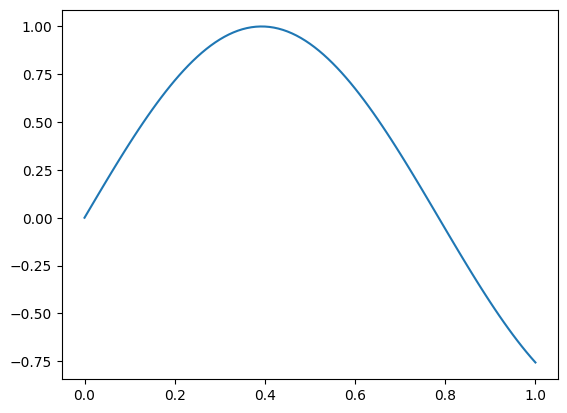

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# creamos un espacio lineal
xgrid = np.linspace(0, 1, 101)
y_true = np.sin(4*xgrid)
plt.plot(xgrid,y_true)

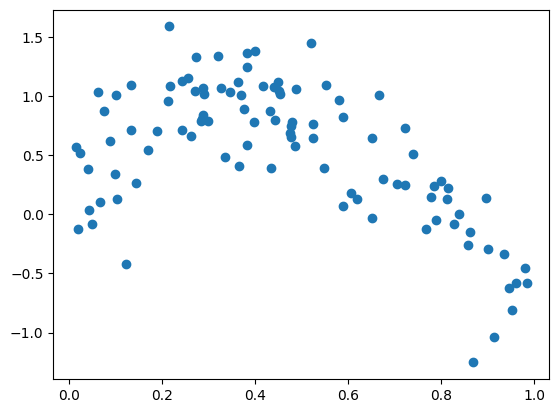

In [29]:
# ahora generamos datos aleatorios que intentaremos ajustar
size_sample = 100
x_sample = np.random.uniform(size=size_sample)
y_sample = np.sin(4*x_sample) + np.random.randn(size_sample)/3
plt.scatter(x_sample,y_sample)

In [30]:
# Creamos una funcion para K-nearest neighbors
def knn(k: int, point:float,data_x:np.ndarray,data_y:np.ndarray) -> float:
    idx_sorted = np.argsort((data_x-point)*(data_x-point))[:k]
    return data_y[idx_sorted].mean()

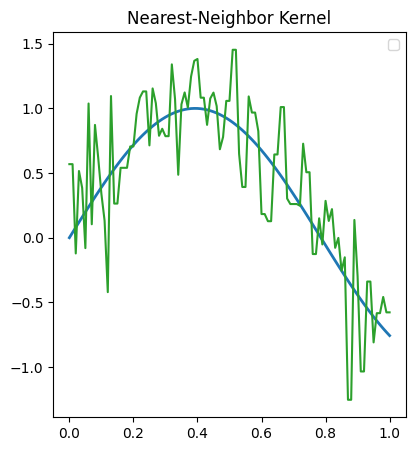

In [31]:
k = 1 # numero de vecinos, cambielos por valores de 0 a 100 ¿Que sucede y porque?
y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()


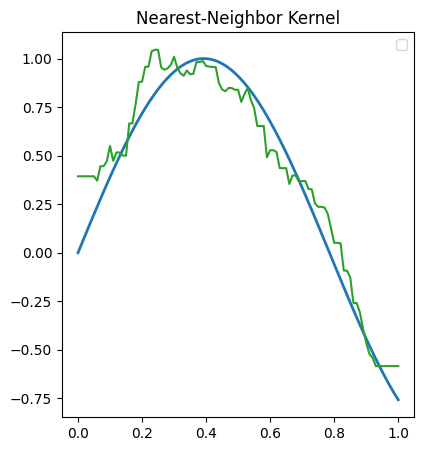

In [32]:
k = 10 # numero de vecinos, cambielos por valores de 0 a 100 ¿Que sucede y porque?
y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()


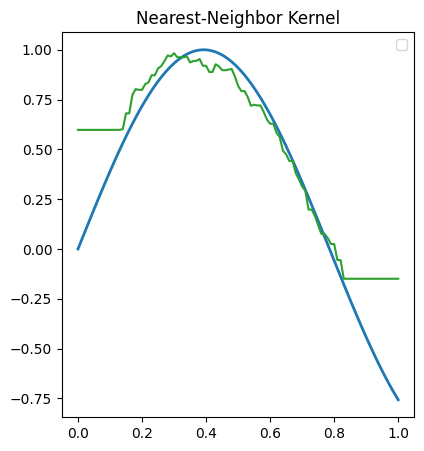

In [33]:
k = 25 # numero de vecinos, cambielos por valores de 0 a 100 ¿Que sucede y porque?
y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()


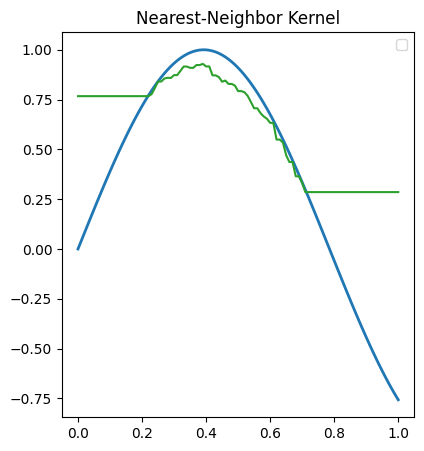

In [34]:
k = 50 # numero de vecinos, cambielos por valores de 0 a 100 ¿Que sucede y porque?
y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()


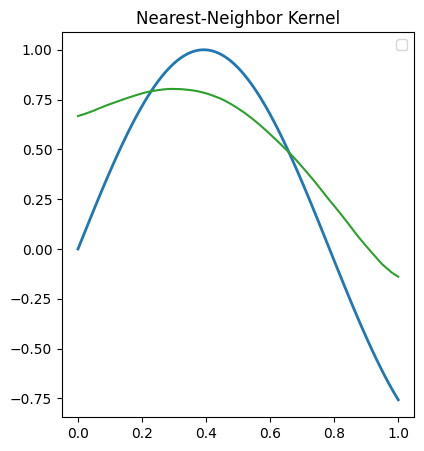

In [48]:
lmbda = 0.5
y_knn = np.array([Epanechnikov(lmbda, x, x_sample, y_sample)
                              for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()


In [ ]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=1.0)

y_knn = np.array([knn(k, x, x_sample, y_sample) for x in xgrid])
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xgrid, y_true, color='C0', linewidth=2)
ax1.plot(xgrid, y_knn, color='C2')
ax1.set_title('Nearest-Neighbor Kernel')
plt.legend()
plt.show()